<a href="https://colab.research.google.com/github/PrarthanaL/Machine_Learning_VAC/blob/main/Project_VAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Import the libraries and load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Task 2 - Basic data exploration

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

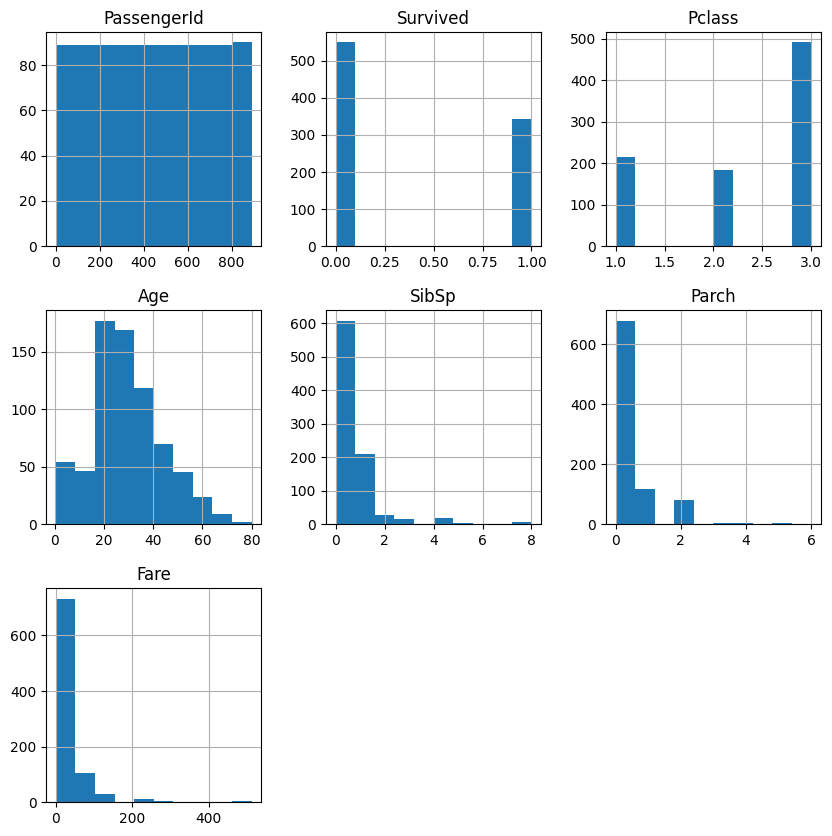

In [ ]:
df.hist(figsize=(10, 10))

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Task 3 - Check for invalid values

In [ ]:
cond1 = df['Age'] < 1
df[cond1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [ ]:
cond2 = df['Fare'] < 10
df[cond2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


# Task 4 - Remove invalid rows

In [ ]:
cond1 = df['Age'] >= 0
cond2 = df['Fare'] >= 0
df = df[cond1 & cond2]
df.shape

(714, 12)

In [ ]:
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

# Task 5 - Split data into training and test subsets

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# Task 6 - Check for correlation among features

In [ ]:
X_train.corr()

<ipython-input-27-1d31ae5364df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.054267,-0.085468,0.055762,-0.117844,-0.023013,0.033626
Survived,0.054267,1.000000,-0.351434,-0.078050,-0.009122,0.118720,0.280028
Pclass,-0.085468,-0.351434,1.000000,-0.359937,0.045290,0.035153,-0.532094
Age,0.055762,-0.078050,-0.359937,1.000000,-0.294161,-0.194395,0.078006
SibSp,-0.117844,-0.009122,0.045290,-0.294161,1.000000,0.401616,0.152936
Parch,-0.023013,0.118720,0.035153,-0.194395,0.401616,1.000000,0.169771
Fare,0.033626,0.280028,-0.532094,0.078006,0.152936,0.169771,1.000000


# Task 7 - Plot scatter plots And Visualize Heatmap

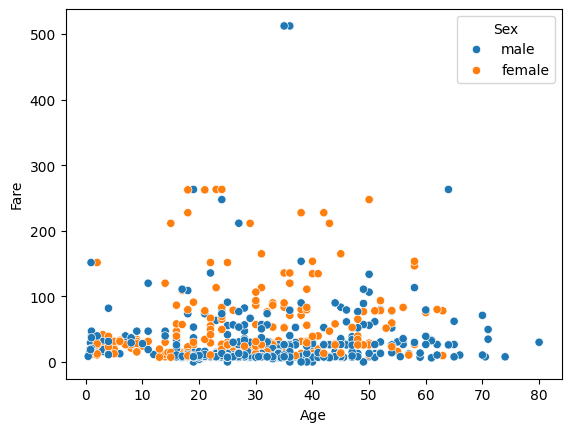

In [ ]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Sex')
plt.show()

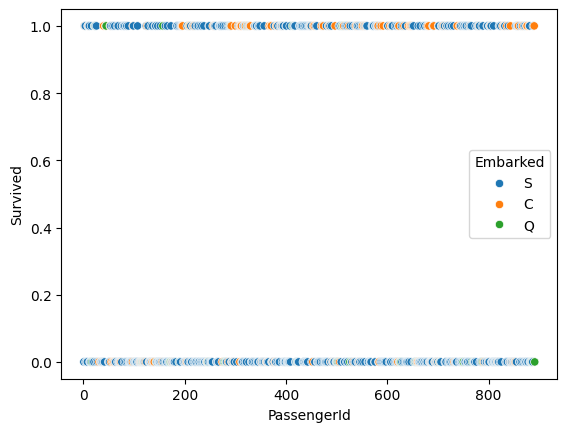

In [ ]:
sns.scatterplot(data=df, x='PassengerId', y='Survived', hue='Embarked')
plt.show()

In [ ]:
correlation_matrix = df[['Age','SibSp','Parch','Fare']].corr()
correlation_matrix

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.383820,0.138329
Parch,-0.189119,0.383820,1.000000,0.205119
Fare,0.096067,0.138329,0.205119,1.000000


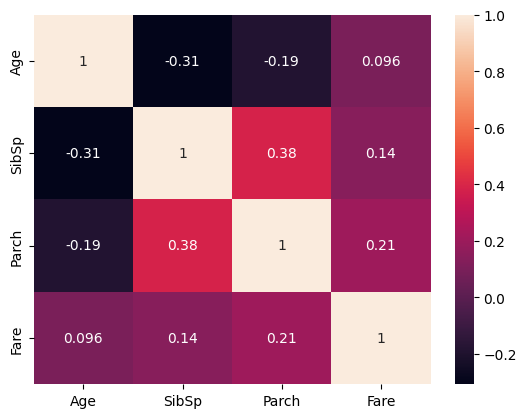

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Task 8 - Data preprocessing

In [ ]:
df['Embarked'].value_counts()

S    556
C    130
Q     28
Name: Embarked, dtype: int64

In [ ]:
pd.crosstab(index=df['Survived'], columns=df['Embarked'])

Embarked,C,Q,S
Survived,,,
0,51,20,353
1,79,8,203


In [ ]:
df['Family'] = df['Parch'] + df['SibSp']
df['Survived'] = df['Survived'].replace([0,1], ['N', 'Y'])
df['Sex'] = df['Sex'].replace(['male', 'female'], [0,1])

In [ ]:
def extract_title(name):
    title = name.split(',')[1].split('.')[0]

    if (title.strip() == 'Mr'):
        return 0
    if (title.strip() == 'Mrs'):
        return 1
    if (title.strip() == 'Miss'):
        return 2

    else:
        return 3

df['Rank'] = df['Name'].apply(extract_title)

In [ ]:
def groupCabins(Cabin):
    if(pd.notnull(Cabin)):
        return Cabin[0]
    else:
        return "U" # for Unknown

df['CabinGroup'] = df['Cabin'].apply(groupCabins)

In [ ]:
df.drop('Name', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Parch', axis=1, inplace=True)
df.drop('SibSp', axis=1, inplace=True)
df.drop('Fare', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

imputer = SimpleImputer(strategy='most_frequent')
df[['Embarked']] = imputer.fit_transform(df[['Embarked']])

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Embarked      0
Family        0
Rank          0
CabinGroup    0
dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Rank,CabinGroup
0,N,3,0,22.0,S,1,0,U
1,Y,1,1,38.0,C,1,1,C
2,Y,3,1,26.0,S,0,2,U
3,Y,1,1,35.0,S,1,1,C
4,N,3,0,35.0,S,0,0,U


In [ ]:
df = pd.get_dummies(df, columns=['Rank', 'CabinGroup', 'Pclass', 'Sex', 'Embarked'], drop_first=True)

In [ ]:
df.head()

,Survived,Age,Family,Rank_1,Rank_2,Rank_3,CabinGroup_B,CabinGroup_C,CabinGroup_D,CabinGroup_E,CabinGroup_F,CabinGroup_G,CabinGroup_T,CabinGroup_U,Pclass_2,Pclass_3,Sex_1,Embarked_Q,Embarked_S
0,N,22.0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
1,Y,38.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,Y,26.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1
3,Y,35.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
4,N,35.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1


# Task 9 - Modeling The Data


In [ ]:
x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [ ]:
model = RandomForestClassifier(n_estimators=200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# Task 10 - Model Evaluation

In [ ]:
model.score(x_train, y_train)

0.9597197898423818

In [ ]:
model.score(x_test, y_test)

0.8321678321678322

> The model train score represents how well the model built fits the
  training data. Here the dataset being used is the Titanic dataset and the model built is the Random Forest Classifier. The model train score is calculated to be around 95%.
> The model test score is used to assess how well the trained model
  performs on unseen data. The score returned by this method provides an indication of the model's generalization performance. Here the model test score is calculated to be around 83%.  